In [43]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import multiprocessing as multi
from datetime import datetime
import scipy.integrate as integrate
import numpy as np 
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits


In [2]:
data_address = 'Data/'
dpi = 120

In [49]:
hdul = fits.open(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North.fits')
# hdul[1].header
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  362 / width of table in bytes                        
NAXIS2  =               953255 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   42 / number of fields in each row                   
TTYPE1  = 'RA      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'DEC     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'RUN     '        

In [3]:
%%time

table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North.fits', format='fits')

# print(table)

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_north = table[names].to_pandas()

# df_north = table.to_pandas()

print(datetime.now())
df_north.describe()

2021-08-30 18:22:35.174268
CPU times: user 831 ms, sys: 1.19 s, total: 2.02 s
Wall time: 2.86 s


,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,...,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,3744.559966,3.480417,190.047421,526.441764,22.120926,13685.012243,6644.149003,1.141736,...,0.000347,0.987200,4730.584234,469.441013,55504.662428,22.352079,11135.404303,0.001025,94503.423641,0.846065
std,39.000977,17.995544,1299.838502,1.574778,141.918394,302.155323,10.049022,9395.847995,3555.650528,0.105764,...,0.000291,0.017168,1694.359294,280.849513,1132.356820,10.054813,5279.431163,0.031998,140132.725972,0.983210
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.141058,13.152102,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,0.000240,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6215.000000,1.000000
50%,184.641353,26.955008,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6803.000000,1.123701,...,0.000330,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.078796,42.385037,4670.000000,5.000000,252.000000,716.000000,31.000000,21619.000000,9101.000000,1.199142,...,0.000404,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.500000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,0.025111,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [4]:
df_north[['RA', 'DEC', 'Z']].describe()

,RA,DEC,Z
count,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,0.455062
std,39.000977,17.995544,0.155204
min,108.937131,-3.628120,-0.011447
25%,152.141058,13.152102,0.352654
50%,184.641353,26.955008,0.489353
75%,217.078796,42.385037,0.564193
max,263.907507,68.737699,1.002166


2021-08-30 18:22:38.483225


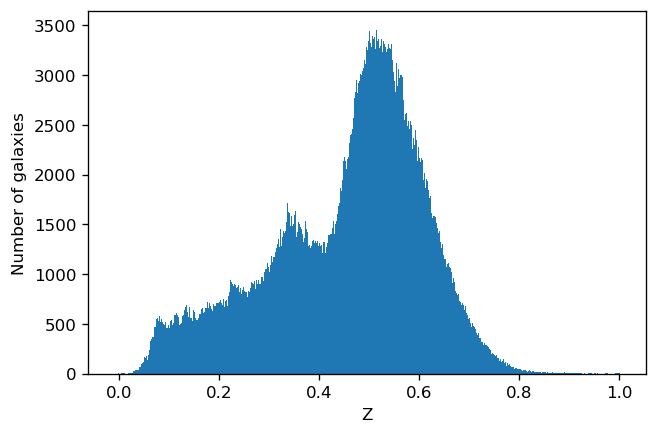

In [5]:
plt.figure(dpi = dpi)
plt.hist(df_north['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [6]:
df_north_pos_z = df_north[df_north['Z'] > 0].copy()
df_north_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,...,9.531930e+05,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,3744.575764,3.480431,190.045211,526.466500,22.121051,13685.160683,6644.178946,1.141741,...,3.469543e-04,0.987201,4730.550378,469.441076,55504.633551,22.352188,11135.269964,0.001025,94502.315741,0.846043
std,38.999948,17.995523,1299.835047,1.574764,141.917793,302.146071,10.049019,9395.851709,3555.646624,0.105763,...,2.913079e-04,0.017168,1694.391087,280.848799,1132.384028,10.054813,5279.554828,0.031999,140131.281732,0.983232
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.023293e-08,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.140573,13.151964,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,2.396823e-04,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6214.000000,1.000000
50%,184.639602,26.954585,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6804.000000,1.123701,...,3.300774e-04,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.076180,42.384830,4670.000000,5.000000,252.000000,716.000000,31.000000,21620.000000,9101.000000,1.199153,...,4.038898e-04,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.000000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,2.511126e-02,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [7]:
cosmo.h

0.6766

In [9]:
%%time

df_north_pos_z['r_comov[Mpc/h]'] =  cosmo.comoving_distance(df_north_pos_z['Z']).value / cosmo.h


c = SkyCoord(ra = df_north_pos_z['RA'] * u.degree, 
             dec = df_north_pos_z['DEC'] * u.degree, 
             distance = df_north_pos_z['r_comov[Mpc/h]'])


df_north_pos_z['X_comov[Mpc/h]'] =  c.cartesian.x.value
df_north_pos_z['Y_comov[Mpc/h]'] =  c.cartesian.y.value
df_north_pos_z['Z_comov[Mpc/h]'] =  c.cartesian.z.value

df_north_pos_z.head()

CPU times: user 57.4 s, sys: 844 ms, total: 58.3 s
Wall time: 58.3 s


,RA,DEC,RUN,RERUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,...,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
0,195.071285,-0.590771,745,b'301 ',2,242,263,7,31442,12561,...,55337,7,10371,0,35880,1,2704.395477,-2611.233755,-703.161177,-27.884270
1,195.022992,-0.610999,745,b'301 ',2,242,557,7,31442,12561,...,55337,7,10371,0,8843,1,3197.099944,-3087.653536,-828.662392,-34.093028
2,195.079741,0.348981,745,b'301 ',4,243,389,7,30058,1642,...,55337,7,10371,0,13065,2,3415.450663,-3297.777358,-888.557803,20.802909
3,195.170574,0.359864,745,b'301 ',4,243,722,7,30064,1643,...,55600,7,10372,0,12492,1,2886.985908,-2786.322445,-755.490623,18.132505
4,195.204289,0.347267,745,b'301 ',4,243,883,7,30064,1643,...,55337,7,10371,0,2060,1,3165.404974,-3054.549769,-830.148348,19.185261


In [10]:
%%time
df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc/h]', 'X_comov[Mpc/h]', 'Y_comov[Mpc/h]', 'Z_comov[Mpc/h]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv')

CPU times: user 12.8 s, sys: 1.75 s, total: 14.5 s
Wall time: 17 s


In [11]:
%%time
df_north_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv', 
                index_col = 0)
df_north_pos_z.describe()

CPU times: user 1.14 s, sys: 47.9 ms, total: 1.19 s
Wall time: 1.19 s


,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,2613.689692,-1718.046336,-144.644526,1169.045496
std,38.999948,17.995523,0.155186,816.380883,800.127349,1365.322309,808.871287
min,108.937131,-3.628120,0.000005,0.032047,-4993.669936,-4315.739598,-255.114052
25%,152.140573,13.151964,0.352676,2111.925385,-2318.641500,-1185.497858,485.355177
50%,184.639602,26.954585,0.489364,2823.776681,-1675.125617,-137.058437,1076.446565
75%,217.076180,42.384830,0.564200,3189.449730,-1100.925553,878.184222,1770.038176
max,263.907507,68.737699,1.002166,5026.623128,-0.006765,4241.545865,4441.835164


**27 July, 2021**  
A: For the paper, we should use Planck cosmology when dealing with observations. For (Magneticum simulations), we can continue with WMAP7 cosmology.

In [12]:
df_north_pos_z.head()

,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
0,195.071285,-0.590771,0.465648,2704.395477,-2611.233755,-703.161177,-27.884270
1,195.022992,-0.610999,0.565802,3197.099944,-3087.653536,-828.662392,-34.093028
2,195.079741,0.348981,0.612211,3415.450663,-3297.777358,-888.557803,20.802909
3,195.170574,0.359864,0.502060,2886.985908,-2786.322445,-755.490623,18.132505
4,195.204289,0.347267,0.559173,3165.404974,-3054.549769,-830.148348,19.185261


In [14]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_north_pos_z_sample = df_north_pos_z.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_north_pos_z_sample['X_comov[Mpc/h]'], 
           df_north_pos_z_sample['Y_comov[Mpc/h]'], 
           df_north_pos_z_sample['Z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-30 18:25:35.278689


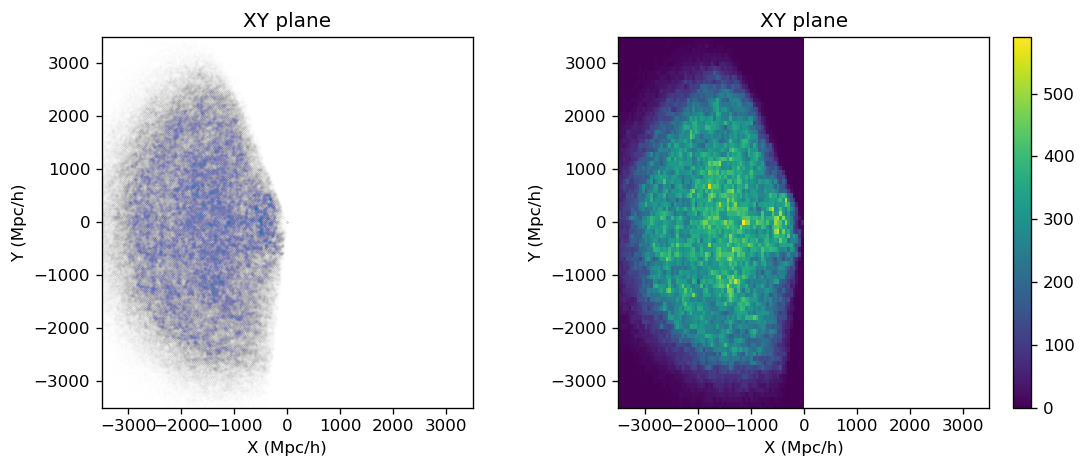

In [15]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['X_comov[Mpc/h]'][0:no_gal_show], 
            df_north_pos_z['Y_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['X_comov[Mpc/h]'][0:no_gal_show], 
           df_north_pos_z['Y_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

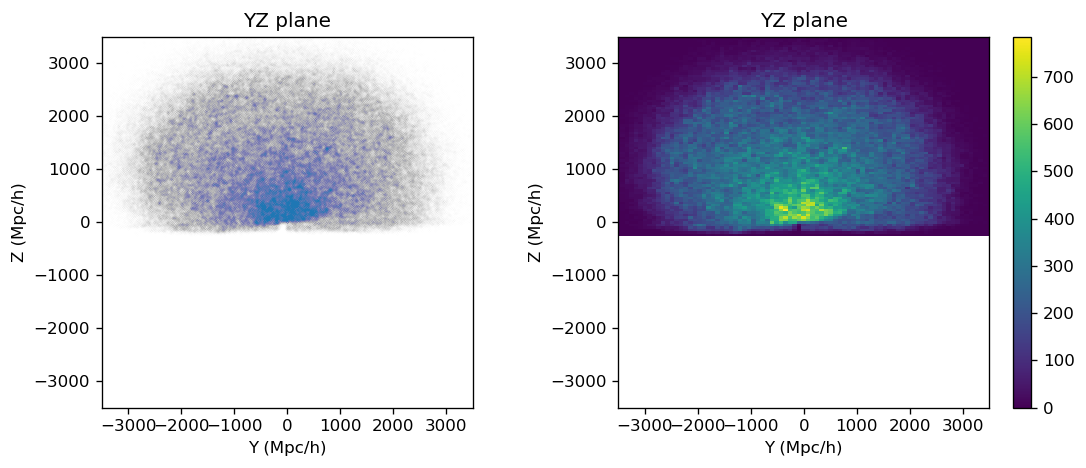

In [16]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Y_comov[Mpc/h]'][0:no_gal_show], 
            df_north_pos_z['Z_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Y_comov[Mpc/h]'][0:no_gal_show], 
           df_north_pos_z['Z_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

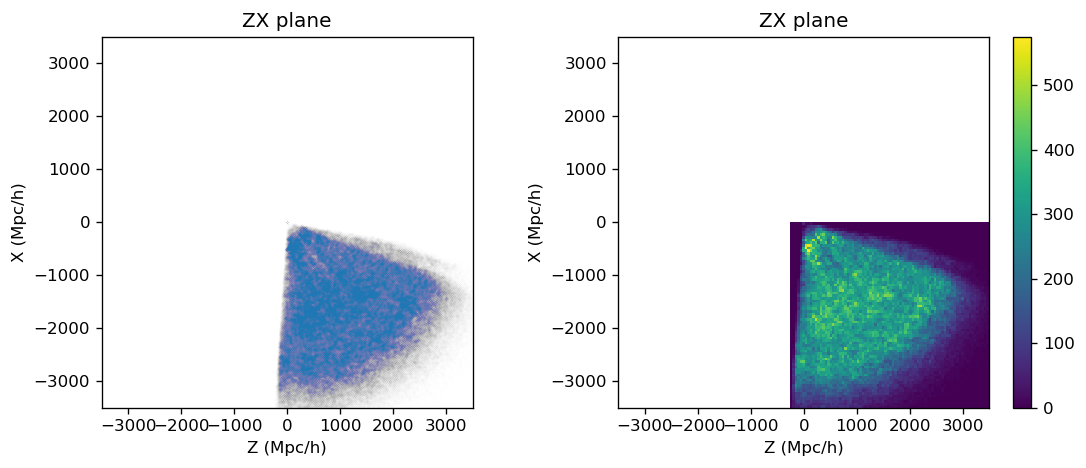

In [17]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Z_comov[Mpc/h]'][0:no_gal_show], 
            df_north_pos_z['X_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Z_comov[Mpc/h]'][0:no_gal_show], 
           df_north_pos_z['X_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();

**27 July, 2021**  
**Task** Include southern galaxies as well.  
**Task** Use WHL clusters.  
**Task** Attend ACT workshop. They'll show how to use ACT cluster catalog which is better than Planck and overlaps with SLOAN skys. In the end if we want to make a physical conclusion about custers velocity error and tau error, this will be a good data set. We can use this WHL catalog but this are optical catalog. Planck map is actually very good because of many frequencies but sensitivity or resolution is much worse.

We will use some kind of CMB data to draw conclusions about gas mass or optical depth etc.

If mass trend is there, then people have been underestimating the velocities and overestimating the gas mass. This can an interesting result.

In [18]:
%%time

table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South.fits', format='fits')

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_south = table[names].to_pandas()

print(datetime.now())
df_south.describe()

2021-08-30 18:27:57.217416
CPU times: user 350 ms, sys: 1.13 s, total: 1.49 s
Wall time: 1.51 s


,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.00000,372601.000000,372601.000000,372601.000000,372601.000000,...,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000
mean,162.780357,11.300913,6738.093553,3.443458,174.302997,559.43804,21.478327,22727.812921,6348.021994,1.311377,...,0.000372,0.984833,5200.196374,494.962697,55867.548386,21.909960,12588.143108,0.000590,74359.359325,1.167879
std,161.256804,11.972804,1903.044050,1.616832,126.042197,328.90751,9.759224,7719.568838,3606.539332,0.220202,...,0.000284,0.018634,1358.198957,285.779914,826.499099,9.792409,3274.395204,0.024292,85187.339130,0.786369
min,0.000091,-10.997172,94.000000,1.000000,11.000000,3.00000,9.000000,7366.000000,1755.000000,1.000512,...,0.000000,0.800000,371.000000,1.000000,51782.000000,9.000000,0.000000,0.000000,-1.000000,-1.000000
25%,16.283820,1.174385,5641.000000,2.000000,79.000000,310.00000,12.000000,15931.000000,2873.000000,1.137283,...,0.000260,0.969828,4347.000000,248.000000,55539.000000,12.000000,10885.000000,0.000000,11179.000000,1.000000
50%,34.528532,9.683856,7767.000000,3.000000,138.000000,525.00000,19.000000,24092.000000,5845.000000,1.268831,...,0.000344,0.994595,5061.000000,489.000000,55923.000000,19.000000,13590.000000,0.000000,35440.000000,1.000000
75%,340.592723,21.144423,7913.000000,5.000000,243.000000,745.00000,32.000000,29577.000000,9953.000000,1.453965,...,0.000395,1.000000,6255.000000,744.000000,56267.000000,32.000000,15156.000000,0.000000,118038.000000,1.000000
max,359.998608,36.236754,8162.000000,6.000000,755.000000,2928.00000,38.000000,33071.000000,12839.000000,2.022085,...,0.018855,1.000000,7248.000000,1000.000000,56693.000000,39.000000,15743.000000,1.000000,368370.000000,18.000000


2021-08-30 18:28:07.153379


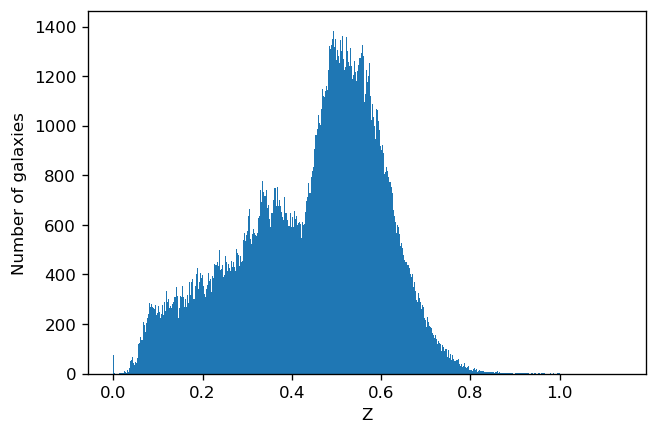

In [19]:
plt.figure(dpi = dpi)
plt.hist(df_south['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [20]:
df_south_pos_z = df_south[df_south['Z'] > 0].copy()
df_south_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,...,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,6738.073959,3.443531,174.309681,559.501015,21.478569,22728.310424,6348.139101,1.311401,...,0.000372,0.984832,5200.192639,494.953157,55867.539630,21.910177,12588.097374,0.000591,74361.058772,1.167895
std,161.256249,11.972713,1903.087506,1.616848,126.044480,328.892511,9.759249,7719.479105,3606.586464,0.220203,...,0.000284,0.018634,1358.252564,285.780436,826.548107,9.792451,3274.555314,0.024294,85190.138130,0.786424
min,0.000091,-10.997172,94.000000,1.000000,11.000000,3.000000,9.000000,7366.000000,1755.000000,1.000512,...,0.000000,0.800000,371.000000,1.000000,51782.000000,9.000000,0.000000,0.000000,-1.000000,-1.000000
25%,16.281862,1.173705,5641.000000,2.000000,79.000000,310.000000,12.000000,15931.000000,2873.000000,1.137327,...,0.000260,0.969828,4347.000000,248.000000,55539.000000,12.000000,10885.000000,0.000000,11179.000000,1.000000
50%,34.522996,9.683287,7767.000000,3.000000,138.000000,525.000000,19.000000,24092.000000,5845.000000,1.268832,...,0.000344,0.994595,5061.000000,489.000000,55923.000000,19.000000,13590.000000,0.000000,35439.500000,1.000000
75%,340.593408,21.142082,7913.000000,5.000000,243.000000,745.000000,32.000000,29577.000000,9953.000000,1.454039,...,0.000395,1.000000,6255.000000,744.000000,56267.000000,32.000000,15156.000000,0.000000,118040.750000,1.000000
max,359.998608,36.236754,8162.000000,6.000000,755.000000,2928.000000,38.000000,33071.000000,12839.000000,2.022085,...,0.018855,1.000000,7248.000000,1000.000000,56693.000000,39.000000,15743.000000,1.000000,368370.000000,18.000000


In [21]:
%%time

df_south_pos_z['r_comov[Mpc/h]'] =  cosmo.comoving_distance(df_south_pos_z['Z']).value / cosmo.h


c = SkyCoord(ra = df_south_pos_z['RA'] * u.degree, 
             dec = df_south_pos_z['DEC'] * u.degree, 
             distance = df_south_pos_z['r_comov[Mpc/h]'])


df_south_pos_z['X_comov[Mpc/h]'] =  c.cartesian.x.value
df_south_pos_z['Y_comov[Mpc/h]'] =  c.cartesian.y.value
df_south_pos_z['Z_comov[Mpc/h]'] =  c.cartesian.z.value

df_south_pos_z.head()

CPU times: user 22.9 s, sys: 249 ms, total: 23.2 s
Wall time: 23.2 s


,RA,DEC,RUN,RERUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,...,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
0,321.480329,9.973440,2507,b'301 ',1,30,517,9,24034,1819,...,55470,9,10408,0,12287,1,1829.739657,1409.944228,-1122.310857,316.895611
1,321.359691,9.933358,2507,b'301 ',1,30,887,9,24034,1819,...,55470,9,10408,0,9836,1,2669.973547,2054.203487,-1642.216563,460.577393
2,322.614181,10.144496,2507,b'301 ',1,38,426,9,24034,1819,...,55470,9,10408,0,4484,1,3261.639055,2551.068964,-1949.439192,574.476549
3,325.011054,10.531999,2507,b'301 ',1,54,1874,9,24037,1839,...,55475,9,10412,0,13060,1,3691.651795,2973.479880,-2081.198228,674.777232
4,325.200214,10.495498,2507,b'301 ',1,55,250,9,24037,1839,...,55475,9,10412,0,15973,1,2964.268447,2393.388407,-1663.435017,539.966018


In [22]:
%%time
df_south_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc/h]', 'X_comov[Mpc/h]', 'Y_comov[Mpc/h]', 'Z_comov[Mpc/h]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South_Comov.csv')

CPU times: user 3.81 s, sys: 309 ms, total: 4.12 s
Wall time: 4.12 s


In [23]:
%%time
df_south_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South_Comov.csv', 
                index_col = 0)
df_south_pos_z.describe()

CPU times: user 456 ms, sys: 0 ns, total: 456 ms
Wall time: 454 ms


,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,0.443913,2554.207385,2279.940485,104.242847,484.581745
std,161.256249,11.972713,0.159550,841.391459,776.130353,933.286113,560.982980
min,0.000091,-10.997172,0.000017,0.108151,0.086039,-3118.332322,-805.466372
25%,16.281862,1.173705,0.334774,2014.355239,1777.146902,-535.219106,43.179164
50%,34.522996,9.683287,0.477807,2765.813582,2421.704983,117.776058,364.028416
75%,340.593408,21.142082,0.560722,3172.820899,2841.581984,761.099741,872.840721
max,359.998608,36.236754,1.136586,5500.919687,4902.803419,3335.833234,2773.415273


In [24]:
df_south_pos_z.head()

,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
0,321.480329,9.973440,0.301401,1829.739657,1409.944228,-1122.310857,316.895611
1,321.359691,9.933358,0.458872,2669.973547,2054.203487,-1642.216563,460.577393
2,322.614181,10.144496,0.579384,3261.639055,2551.068964,-1949.439192,574.476549
3,325.011054,10.531999,0.672858,3691.651795,2973.479880,-2081.198228,674.777232
4,325.200214,10.495498,0.517716,2964.268447,2393.388407,-1663.435017,539.966018


In [25]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_south_pos_z_sample = df_south_pos_z.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_south_pos_z_sample['X_comov[Mpc/h]'], 
           df_south_pos_z_sample['Y_comov[Mpc/h]'], 
           df_south_pos_z_sample['Z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-30 18:29:44.134574


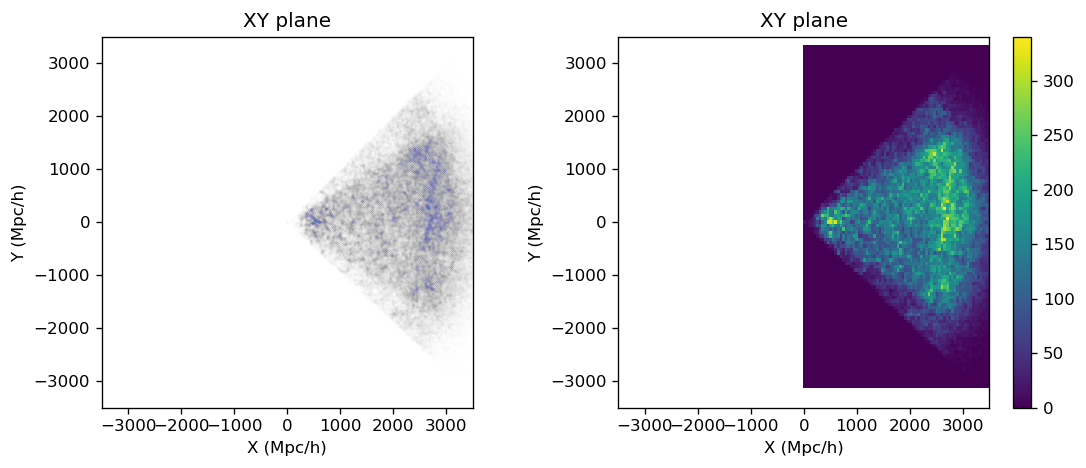

In [26]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['X_comov[Mpc/h]'][0:no_gal_show], 
            df_south_pos_z['Y_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['X_comov[Mpc/h]'][0:no_gal_show], 
           df_south_pos_z['Y_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

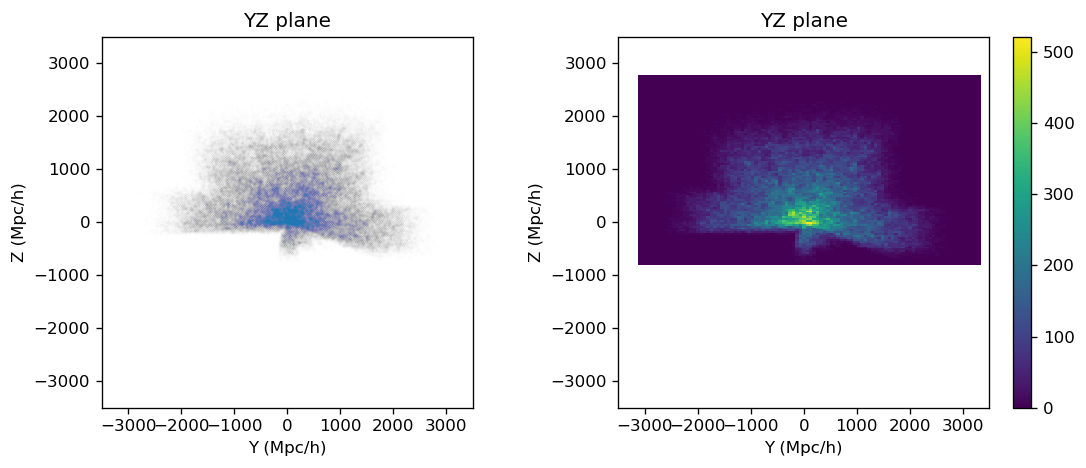

In [27]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['Y_comov[Mpc/h]'][0:no_gal_show], 
            df_south_pos_z['Z_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['Y_comov[Mpc/h]'][0:no_gal_show], 
           df_south_pos_z['Z_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

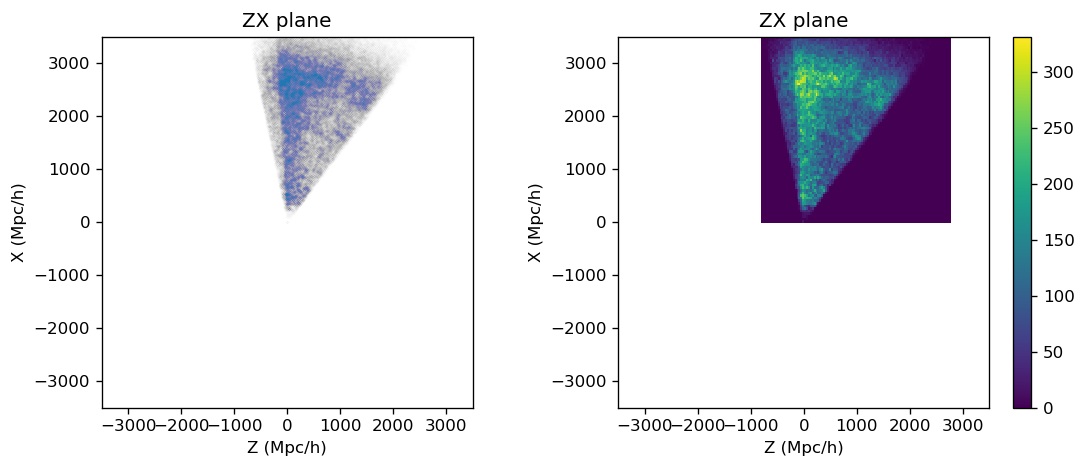

In [28]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['Z_comov[Mpc/h]'][0:no_gal_show], 
            df_south_pos_z['X_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['Z_comov[Mpc/h]'][0:no_gal_show], 
           df_south_pos_z['X_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();

In [47]:
df_all_sky = df_north_pos_z.append(df_south_pos_z)
df_all_sky.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000,1325735.000
mean,178.676,23.417,0.452,2596.975,-594.580,-74.705,976.706
std,92.194,18.180,0.157,823.919,1964.434,1263.945,808.397
min,0.000,-10.997,0.000,0.032,-4993.670,-4315.740,-805.466
25%,135.845,8.361,0.347,2083.786,-2049.560,-983.879,307.587
50%,181.891,21.477,0.486,2808.285,-1230.263,-33.060,847.189
75%,227.366,35.940,0.563,3185.174,1177.849,835.904,1535.834
max,359.999,68.738,1.137,5500.920,4902.803,4241.546,4441.835


In [30]:
df_north_pos_z.describe()

,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,2613.689692,-1718.046336,-144.644526,1169.045496
std,38.999948,17.995523,0.155186,816.380883,800.127349,1365.322309,808.871287
min,108.937131,-3.628120,0.000005,0.032047,-4993.669936,-4315.739598,-255.114052
25%,152.140573,13.151964,0.352676,2111.925385,-2318.641500,-1185.497858,485.355177
50%,184.639602,26.954585,0.489364,2823.776681,-1675.125617,-137.058437,1076.446565
75%,217.076180,42.384830,0.564200,3189.449730,-1100.925553,878.184222,1770.038176
max,263.907507,68.737699,1.002166,5026.623128,-0.006765,4241.545865,4441.835164


In [31]:
df_south_pos_z.describe()

,RA,DEC,Z,r_comov[Mpc/h],X_comov[Mpc/h],Y_comov[Mpc/h],Z_comov[Mpc/h]
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,0.443913,2554.207385,2279.940485,104.242847,484.581745
std,161.256249,11.972713,0.159550,841.391459,776.130353,933.286113,560.982980
min,0.000091,-10.997172,0.000017,0.108151,0.086039,-3118.332322,-805.466372
25%,16.281862,1.173705,0.334774,2014.355239,1777.146902,-535.219106,43.179164
50%,34.522996,9.683287,0.477807,2765.813582,2421.704983,117.776058,364.028416
75%,340.593408,21.142082,0.560722,3172.820899,2841.581984,761.099741,872.840721
max,359.998608,36.236754,1.136586,5500.919687,4902.803419,3335.833234,2773.415273


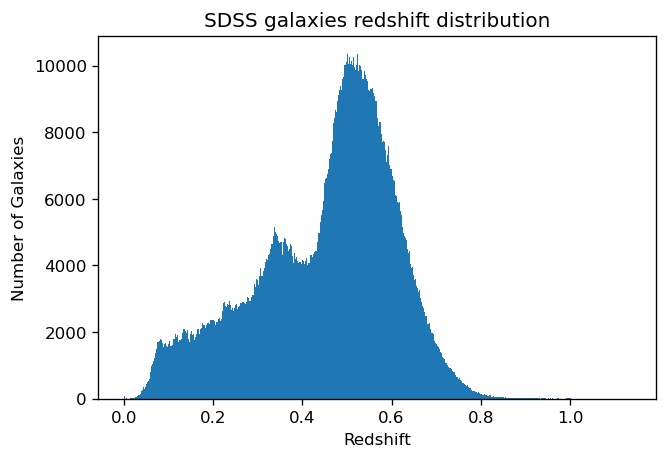

In [41]:
plt.figure(dpi = dpi)
plt.hist(df_all_sky['Z'], bins = 500);
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.title('SDSS galaxies redshift distribution');

**27 Aug 2021**  
A: These are mostly CMASS galaxies. So use only them. Lowz part is not useful for later cluster data. For high mass end, a redshift cut of 0.7 or 0.8 is fine.

In [37]:
df_all_sky.to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_all_sky_Comov.csv')

In [33]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_all_sky_sample = df_all_sky.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_all_sky_sample['X_comov[Mpc/h]'], 
           df_all_sky_sample['Y_comov[Mpc/h]'], 
           df_all_sky_sample['Z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

plt.title('Distribution of SDSS galaxies')

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-30 18:31:15.916648


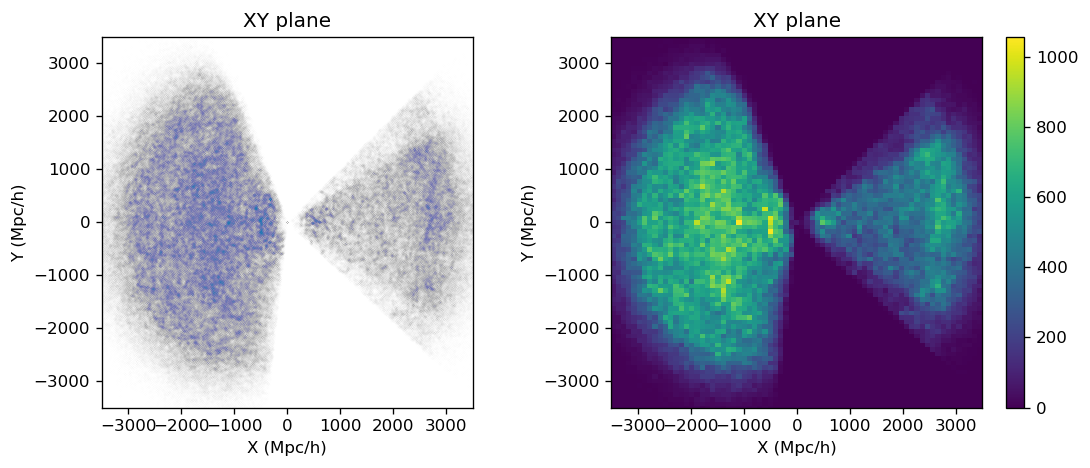

In [34]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['X_comov[Mpc/h]'][0:no_gal_show], 
            df_all_sky['Y_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_all_sky['X_comov[Mpc/h]'][0:no_gal_show], 
           df_all_sky['Y_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

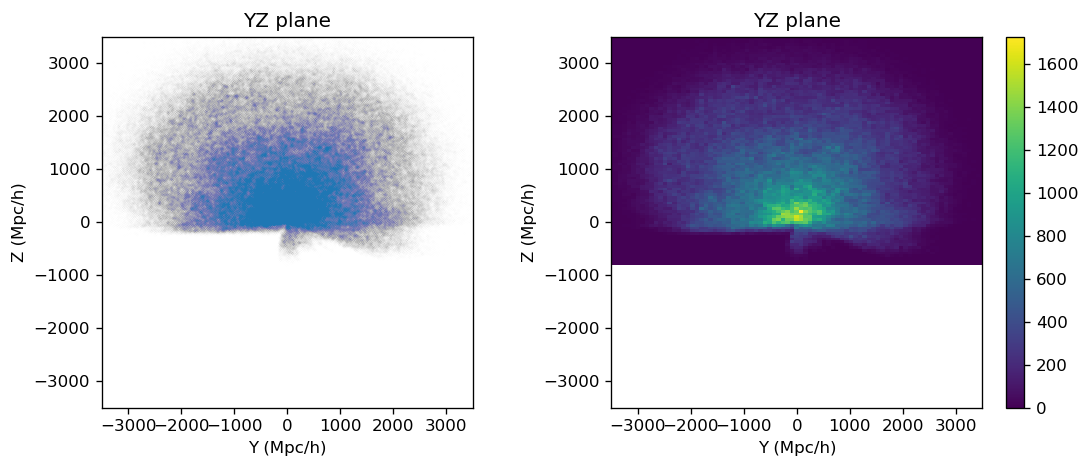

In [35]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['Y_comov[Mpc/h]'][0:no_gal_show], 
            df_all_sky['Z_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_all_sky['Y_comov[Mpc/h]'][0:no_gal_show], 
           df_all_sky['Z_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

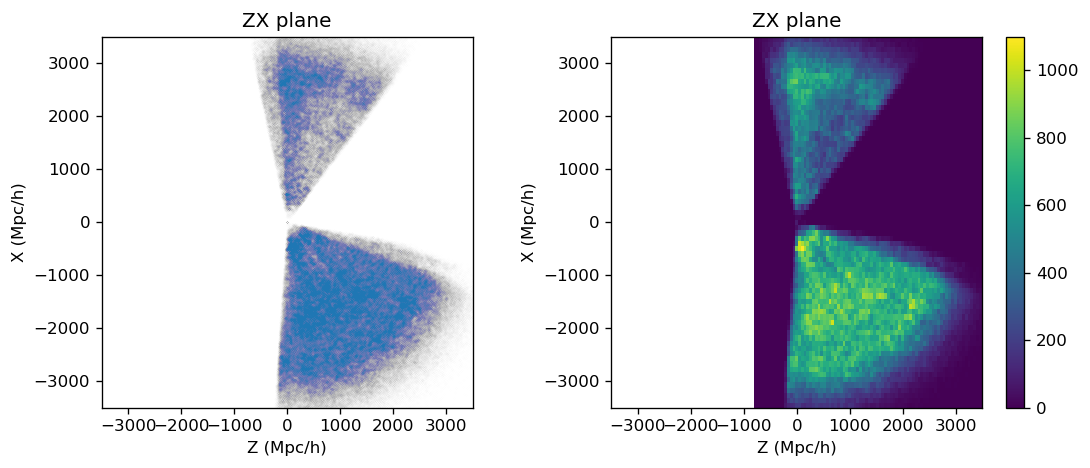

In [36]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['Z_comov[Mpc/h]'][0:no_gal_show], 
            df_all_sky['X_comov[Mpc/h]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_all_sky['Z_comov[Mpc/h]'][0:no_gal_show], 
           df_all_sky['X_comov[Mpc/h]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();